<a href="https://colab.research.google.com/github/MichaelDavisBaskaran/Movie-Recommendation-Engine/blob/main/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# fetch ratings data
!wget https://www.dropbox.com/s/zpjqx685em4hllf/ratings.csv



In [2]:
#use pandas to get access and read data from file
import pandas as pd

ratingDetail = pd.read_csv('ratings.csv')

ratingDetail.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# fetch movies data

!wget https://www.dropbox.com/s/9vk3xh99pt5f27l/movies.csv

In [4]:
import pandas as pd

movieDetail = pd.read_csv('movies.csv')

movieDetail.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#shape

ratingDetail.shape

(100836, 4)

In [7]:
movieDetail.shape

(9742, 3)

In [11]:
ratingDetail.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
movieDetail.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [14]:
data = pd.merge(ratingDetail,movieDetail, on='movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [17]:
#change timestamp into proper time using datetime function

import datetime
from datetime import datetime, date

data['datetime'] = pd.to_datetime(data['timestamp'])

In [30]:
#Average ranking

temp = data
temp= temp.groupby('title')['rating'].mean()
#temp


In [31]:
sortData = temp.sort_values(ascending=False)



In [ ]:
#sortData

In [28]:
temp2 = data.groupby('title')['rating'].count()
#temp2.head() 

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: rating, dtype: int64

In [34]:
newRecord = pd.DataFrame() #call new dataframe

newRecord['Average_Rating'] = temp # create new column with temp data which is average

newRecord['Total_Rating_Count'] = temp2 #create new column with temp2 data which is a count

#newRecord

In [39]:
#Use matlab functionality to visualize

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline


In [40]:
newRecord.columns

Index(['Average_Rating', 'Total_Rating_Count'], dtype='object')

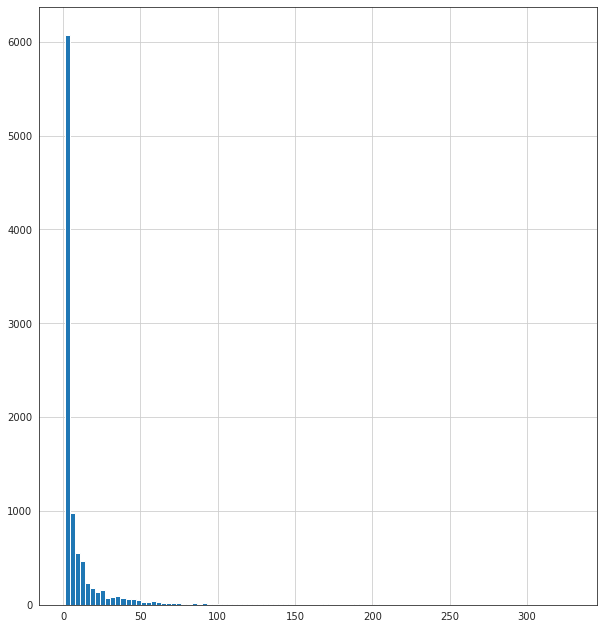

In [44]:
plt.figure(figsize=(10,11))

newRecord['Total_Rating_Count'].hist(bins = 100)

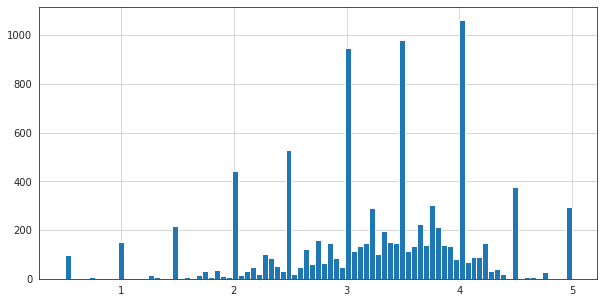

In [45]:
plt.figure(figsize=(10,5))

newRecord['Average_Rating'].hist(bins = 85)